In [1]:
from uncertainties import unumpy
from uncertainties import ufloat
from scipy.optimize import curve_fit
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
screwGaugeLC = 0.01 #mm

clamp = ufloat(6.0, 0.1)/100 #m
length = ufloat(30.0, 0.1)/100 #m

length = (length-clamp)/2

weight0 = ufloat(0, 1)/1000 #kg
weight1 = ufloat(49, 1)/1000 #kg
weight2 = ufloat(49+50, 1)/1000 #kg
weight3 = ufloat(49+50+50, 1)/1000 #kg


width = np.mean(unumpy.uarray([4.00, 4.00, 4.01, 4.00], 0.01)/100)
height = np.mean(unumpy.uarray([0.268,0.269,0.267,0.267,0.267,0.265], 0.001)/100)

wavelength = 589e-9 #m

print(length)
print(width)
print(height)


0.1200+/-0.0007
0.04002+/-0.00005
0.002672+/-0.000004


In [3]:
print('Reading file...')
df = pd.read_excel("data.xlsx")
print('File read successfully\n\n')

Reading file...
File read successfully




In [4]:
order = np.array(df['order'])

dn_w0 = np.array(df['dn_d.w0'])
dn__w0= np.array(df['dn_dd.w0'])

dn_w1 = np.array(df['dn_d.w1'])
dn__w1= np.array(df['dn_dd.w1'])

dn_w2 = np.array(df['dn_d.w2'])
dn__w2= np.array(df['dn_dd.w2'])

dn_w3 = np.array(df['dn_d.w3'])
dn__w3= np.array(df['dn_dd.w3'])


In [5]:
order = order[1:]

dn_w0 = dn_w0[1:]*2
dn__w0 = (dn__w0 - dn__w0[0])[1:]*2

dn_w1 = dn_w1[1:]*2
dn__w1 = (dn__w1 - dn__w1[0])[1:]*2

dn_w2 = dn_w2[1:]*2
dn__w2 = (dn__w2 - dn__w2[0])[1:]*2

dn_w3 = dn_w3[1:]*2
dn__w3 = (dn__w3 - dn__w3[0])[1:]*2


In [6]:
dn_w0 = unumpy.uarray(dn_w0, screwGaugeLC)/1000
dn__w0 = unumpy.uarray(dn__w0, screwGaugeLC)/1000


dn_w1 = unumpy.uarray(dn_w1, screwGaugeLC)/1000
dn__w1 = unumpy.uarray(dn__w1, screwGaugeLC)/1000

dn_w2 = unumpy.uarray(dn_w2, screwGaugeLC)/1000
dn__w2 = unumpy.uarray(dn__w2, screwGaugeLC)/1000

dn_w3 = unumpy.uarray(dn_w3, screwGaugeLC)/1000
dn__w3 = unumpy.uarray(dn__w3, screwGaugeLC)/1000

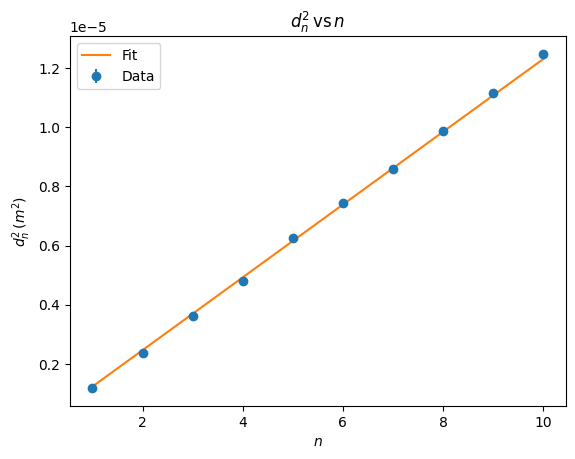

(1.231+/-0.006)e-06


In [7]:
def funcR(x, m):
    return x*m

# dn_2 = np.square((dn_w0+dn__w0)/2)
# popt, popv = curve_fit(funcR, order, unumpy.nominal_values(dn_2), sigma=unumpy.std_devs(dn_2))

# slope = ufloat(popt[0], np.diag(np.sqrt(popv))[0])

# plt.errorbar(unumpy.nominal_values(order), unumpy.nominal_values(dn_2), yerr=unumpy.std_devs(dn_2))
# plt.show()


dn_2 = np.square((dn_w0 + dn__w0) / 2)
popt, popv = curve_fit(funcR, order, unumpy.nominal_values(dn_2), sigma=unumpy.std_devs(dn_2))

slope = ufloat(popt[0], np.diag(np.sqrt(popv))[0])

plt.errorbar(unumpy.nominal_values(order), unumpy.nominal_values(dn_2), yerr=unumpy.std_devs(dn_2), fmt='o', label='Data')
plt.plot(unumpy.nominal_values(order), funcR(order, *popt), label='Fit')
plt.legend()
plt.title(r'$d^2_n \, \text{vs} \, n$')
plt.xlabel(r'$n$')
plt.ylabel(r'$d^2_n \, ( m^2 )$')
plt.show()
print(slope)

In [8]:
R0 = slope/(4*wavelength)
print("Curvature of lens: ", R0)

Curvature of lens:  0.5224+/-0.0027


In [9]:
dn_2w1 = np.square(dn_w1)
dn__2w1 = np.square(dn__w1)

dn_2w2 = np.square(dn_w2)
dn__2w2 = np.square(dn__w2)

dn_2w3 = np.square(dn_w3)
dn__2w3 = np.square(dn__w3)



yVal_R1_W1 =1/(1/(dn_2w1) - 1/(dn_2))
yVal_R1_W2 =1/(1/(dn_2w2) - 1/(dn_2))
yVal_R1_W3 =1/(1/(dn_2w3) - 1/(dn_2))

yVal_R2_W1 =1/(1/(dn__2w1) - 1/(dn_2))*-1
yVal_R2_W2 =1/(1/(dn__2w2) - 1/(dn_2))*-1
yVal_R2_W3 =1/(1/(dn__2w3) - 1/(dn_2))*-1
 

In [10]:
def Y(R1, m):
    return (12*(m)*9.8*length*R1)/(width*(height**3))

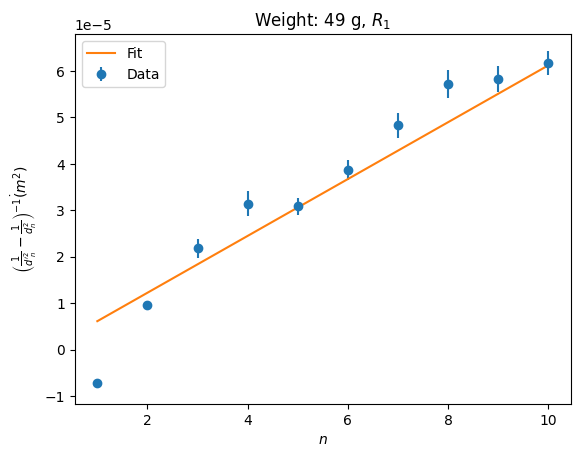

slope (6.1+/-0.7)e-06
2.60+/-0.29


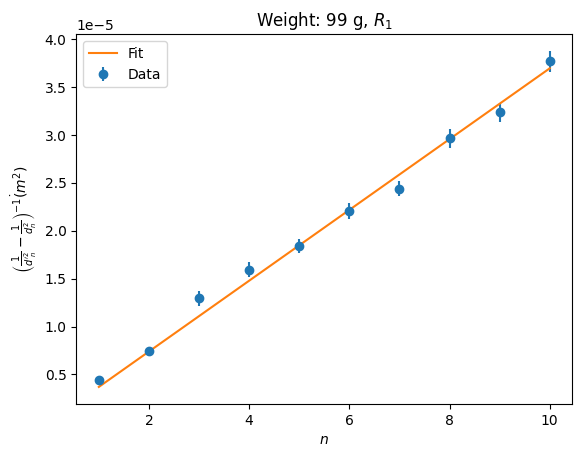

slope (3.69+/-0.06)e-06
1.568+/-0.025


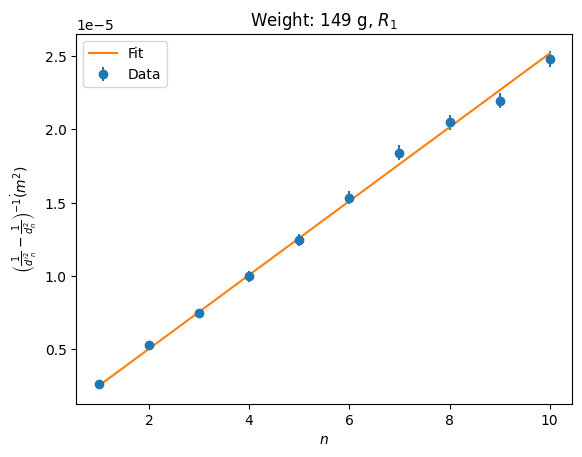

slope (2.519+/-0.021)e-06
1.069+/-0.009


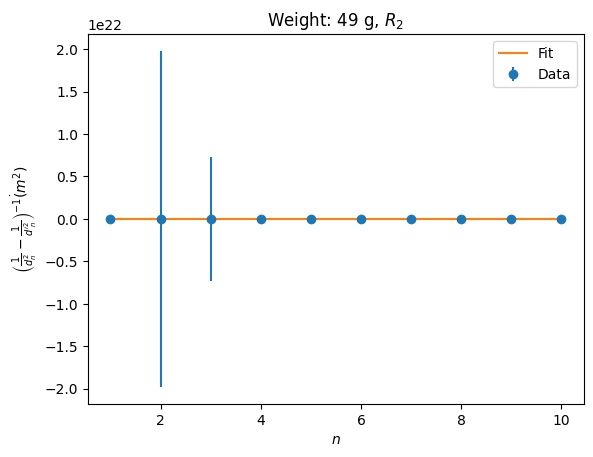

slope (1.67+/-0.20)e-05
7.1+/-0.9


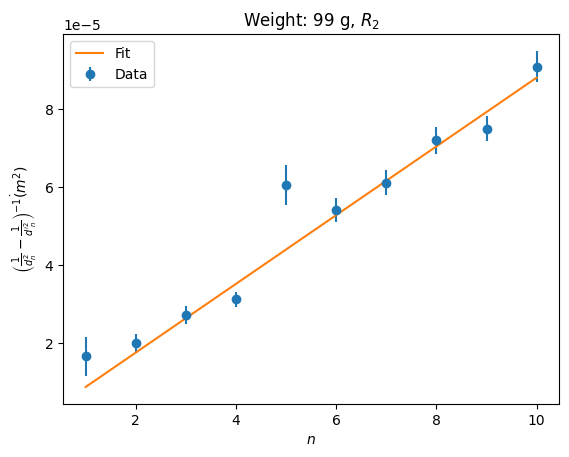

slope (8.81+/-0.25)e-06
3.74+/-0.11


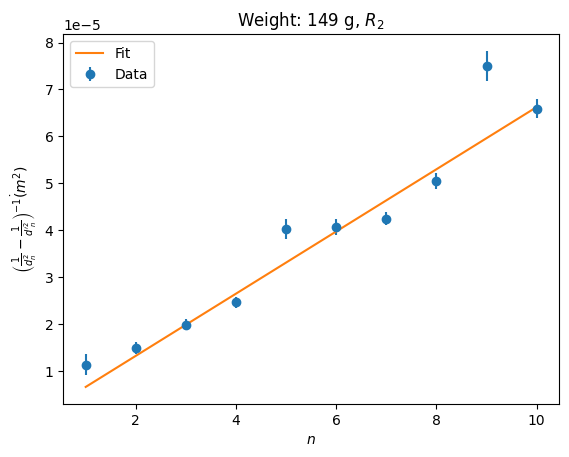

slope (6.62+/-0.22)e-06
2.81+/-0.09



Weight:  49.0+/-1.0 g
Y =  (2.35+/-0.27)e+09
Poisson Ratio =  0.37+/-0.06

Weight:  99.0+/-1.0 g
Y =  (2.87+/-0.06)e+09
Poisson Ratio =  0.419+/-0.014

Weight:  149.0+/-1.0 g
Y =  (2.95+/-0.04)e+09
Poisson Ratio =  0.380+/-0.013

Average Y =  (2.72+/-0.09)e+09
Average Poisson ratio:  0.389+/-0.021


In [11]:
popt, popv = curve_fit(funcR, order ,unumpy.nominal_values(yVal_R1_W1), sigma=unumpy.std_devs(yVal_R1_W1))
slope = ufloat(popt[0], np.diag(np.sqrt(popv))[0])

plt.errorbar(unumpy.nominal_values(order), unumpy.nominal_values(yVal_R1_W1),yerr= unumpy.std_devs(yVal_R1_W1),fmt='o', label='Data')
plt.plot(unumpy.nominal_values(order), funcR(order, *popt), label='Fit')
plt.xlabel(r'$n$')
plt.ylabel(r'''$\left( \frac{1}{d'^2_n} - \frac{1}{d^2_n}      \right)^{-1} \. (m^2)$''')
plt.title(r'$\text{Weight: 49 g, }R_1 $')
plt.legend()
plt.show()
print("slope", slope)


R1_w1 = slope/(4*wavelength)
print(R1_w1)


popt, popv = curve_fit(funcR, order ,unumpy.nominal_values(yVal_R1_W2), sigma=unumpy.std_devs(yVal_R1_W2))
slope = ufloat(popt[0], np.diag(np.sqrt(popv))[0])

R1_w2 = slope/(4*wavelength)

plt.errorbar(unumpy.nominal_values(order), unumpy.nominal_values(yVal_R1_W2),yerr= unumpy.std_devs(yVal_R1_W2),fmt='o', label='Data')
plt.plot(unumpy.nominal_values(order), funcR(order, *popt), label='Fit')
plt.xlabel(r'$n$')
plt.ylabel(r'''$\left( \frac{1}{d'^2_n} - \frac{1}{d^2_n}      \right)^{-1} \. (m^2)$''')
plt.title(r'$\text{Weight: 99 g, }R_1 $')
plt.legend()
plt.show()
print("slope", slope)
print(R1_w2)


popt, popv = curve_fit(funcR, order ,unumpy.nominal_values(yVal_R1_W3), sigma=unumpy.std_devs(yVal_R1_W3))
slope = ufloat(popt[0], np.diag(np.sqrt(popv))[0])

R1_w3 = slope/(4*wavelength)


plt.errorbar(unumpy.nominal_values(order), unumpy.nominal_values(yVal_R1_W3),yerr= unumpy.std_devs(yVal_R1_W3),fmt='o', label='Data')
plt.plot(unumpy.nominal_values(order), funcR(order, *popt), label='Fit')
plt.xlabel(r'$n$')
plt.ylabel(r'''$\left( \frac{1}{d'^2_n} - \frac{1}{d^2_n}      \right)^{-1} \. (m^2)$''')
plt.title(r'$\text{Weight: 149 g, }R_1 $')
plt.legend()
plt.show()
print("slope", slope)
print(R1_w3)



popt, popv = curve_fit(funcR, order ,unumpy.nominal_values(yVal_R2_W1), sigma=unumpy.std_devs(yVal_R2_W1))
slope = ufloat(popt[0], np.diag(np.sqrt(popv))[0])

R2_w1 = slope/(4*wavelength)


plt.errorbar(unumpy.nominal_values(order), unumpy.nominal_values(yVal_R2_W1),yerr= unumpy.std_devs(yVal_R2_W1),fmt='o', label='Data')
plt.plot(unumpy.nominal_values(order), funcR(order, *popt), label='Fit')
plt.xlabel(r'$n$')
plt.ylabel(r'''$\left( \frac{1}{d^2_n}   -  \frac{1}{d'^2_n}      \right)^{-1} \. (m^2)$''')
plt.title(r'$\text{Weight: 49 g, }R_2 $')
plt.legend()
plt.show()
print("slope", slope)
print(R2_w1)

popt, popv = curve_fit(funcR, order ,unumpy.nominal_values(yVal_R2_W2), sigma=unumpy.std_devs(yVal_R2_W2))
slope = ufloat(popt[0], np.diag(np.sqrt(popv))[0])

R2_w2 = slope/(4*wavelength)


plt.errorbar(unumpy.nominal_values(order), unumpy.nominal_values(yVal_R2_W2),yerr= unumpy.std_devs(yVal_R2_W2),fmt='o', label='Data')
plt.plot(unumpy.nominal_values(order), funcR(order, *popt), label='Fit')
plt.xlabel(r'$n$')
plt.ylabel(r'''$\left( \frac{1}{d^2_n}   -  \frac{1}{d'^2_n}     \right)^{-1} \. (m^2)$''')
plt.title(r'$\text{Weight: 99 g, }R_2 $')
plt.legend()
plt.show()
print("slope", slope)
print(R2_w2)


popt, popv = curve_fit(funcR, order ,unumpy.nominal_values(yVal_R2_W3), sigma=unumpy.std_devs(yVal_R2_W3))
slope = ufloat(popt[0], np.diag(np.sqrt(popv))[0])

R2_w3 = slope/(4*wavelength)


plt.errorbar(unumpy.nominal_values(order), unumpy.nominal_values(yVal_R2_W3),yerr= unumpy.std_devs(yVal_R2_W3),fmt='o', label='Data')
plt.plot(unumpy.nominal_values(order), funcR(order, *popt), label='Fit')
plt.xlabel(r'$n$')
plt.ylabel(r'''$\left( \frac{1}{d^2_n}   -  \frac{1}{d'^2_n}   \right)^{-1} \. (m^2)$''')
plt.title(r'$\text{Weight: 149 g, }R_2 $')
plt.legend()
plt.show()
print("slope", slope)
print(R2_w3)


Y1 = Y(R1_w1, weight1)
P1 = R1_w1/R2_w1

Y2 = Y(R1_w2, weight2)
P2 = R1_w2/R2_w2

Y3 =  Y(R1_w3, weight3)
P3 = R1_w3/R2_w3


print('\n\n\nWeight: ', weight1*1000, 'g')
print('Y = ', Y1)
print('Poisson Ratio = ', P1)


print('\nWeight: ', weight2*1000, 'g')
print('Y = ', Y2)
print('Poisson Ratio = ', P2)


print('\nWeight: ', weight3*1000, 'g')
print('Y = ', Y3)
print('Poisson Ratio = ', P3)


print('\nAverage Y = ', (Y1+Y2+Y3)/3)
print('Average Poisson ratio: ', (P1+P2+P3)/3)




In [12]:
print("Writing CSV files...")

DATA = pd.DataFrame(
    {
        "Order": order,
        "dn(horizontal)(mm)": dn_w0 * 1000,
        "dn(vertical)(mm)": dn__w0 * 1000,
        "Avg. dn(mm)": (dn_w0 + dn__w0) / 2 * 1000,
        "dn'(mm) (w1)": dn_w1 * 1000,
        "dn''(mm) (w1)": dn__w1 * 1000,
        "dn'(mm) (w2)": dn_w2 * 1000,
        "dn''(mm) (w2)": dn__w2 * 1000,
        "dn'(mm) (w3)": dn_w3 * 1000,
        "dn''(mm) (w3)": dn__w3 * 1000,
    }
)

calculations_combined = pd.DataFrame(
    {
        "Order": order,
        "dn^2(m^2)": dn_2,
        "1/dn^2(m^-2)": (1/dn_2),
        "1/dn'^2(m^-2) (w1)": (1/dn_2w1),
        "1/dn''^2(m^-2) (w1)": (1/dn__2w1),
        "1/dn'^2 - 1/dn^2 (m^-2) (w1)": 1/yVal_R1_W1,
        "1/dn''^2 - 1/dn^2 (m^-2) (w1)": 1/yVal_R2_W1,
        "1/dn'^2(m^-2) (w2)": (1/dn_2w2),
        "1/dn''^2(m^-2) (w2)": (1/dn__2w2),
        "1/dn'^2 - 1/dn^2 (m^-2) (w2)": 1/yVal_R1_W2,
        "1/dn''^2 - 1/dn^2 (m^-2) (w2)": 1/yVal_R2_W2,
        "1/dn'^2(m^-2) (w3)": (1/dn_2w3),
        "1/dn''^2(m^-2) (w3)": (1/dn__2w3),
        "1/dn'^2 - 1/dn^2 (m^-2) (w3)": 1/yVal_R1_W3,
        "1/dn''^2 - 1/dn^2 (m^-2) (w3)": 1/yVal_R2_W3,
    }
)

calculations_combined.to_csv('Calculations_combined.csv')
DATA.to_csv('Data.csv')

# DATA_0.to_csv('Data no weight.csv')
# DATA_1.to_csv(f'Data {weight1.n*1000}gm.csv')
# DATA_2.to_csv(f'Data {weight2.n*1000}gm.csv')
# DATA_3.to_csv(f'Data {weight3.n*1000}gm.csv')

# calculations_0.to_csv(f'Calc {weight0.n*1000}gm.csv')
# calculations_1.to_csv(f'Calc {weight1.n*1000}gm.csv')
# calculations_2.to_csv(f'Calc {weight2.n*1000}gm.csv')
# calculations_3.to_csv(f'Calc {weight3.n*1000}gm.csv')


print("Done...")


Writing CSV files...
Done...
